# Basic FISSA usage

In [3]:
# Plotting toolbox
import holoviews as hv
%load_ext holoviews.ipython

# FISSA toolbox imports
import fissa.core as fissa

The holoviews.ipython extension is already loaded. To reload it, use:
  %reload_ext holoviews.ipython


In [4]:
# set autoreload of libraries
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Defining an experiment
Define your inputs. All that's necessary to define are the image data and ROIs. 

Images can be defined as a folder with tiffs:
```
images = 'folder'
```
Or a list of arrays if not stored as tiffs:
```
images = [array1, array2, array3, ...]
```

For ROIs either a set of ROIs across all images should be defined, or a set of ROIs per image. 

If the ROIs were defined using ImageJ use ImageJ's export function to save them in a zip. Then, indicate the locations as a list:
```
rois = ['rois.zip'] # for a single set of rois across images
rois = ['rois1.zip', 'rois2.zip',...] # for a roiset for each image
```
Defining a different roiset per image can be useful if you need to adjust for motion drift for example.

Then, we can define out experiment:

In [5]:
rois = ['../exampleData/MC_20150429_A01.zip']
images = '../exampleData/20150529_mini'
experiment = fissa.Experiment(images,rois)

### Extracting traces and separating them
Next, we need to extract the traces and separate them:

In [6]:
filename = 'example_experiment' # make sure you use a different filename for each experiment
experiment.separate(filename)

example_experiment does not exist yet, doing extraction...
Doing region growing and data extraction....
5
Doing signal separation....
doing ROI number 3
doing ROI number 2
doing ROI number 4
doing ROI number 1
doing ROI number 0
NMF converged after 1146 iterations.
NMF converged after 1210 iterations.
NMF converged after 1215 iterations.
NMF converged after 1170 iterations.
NMF converged after 1195 iterations.


## Accessing results
After running ```experiment.separate()``` the results are stored as follows.

#### ROI outlines
The ROI outlines, as well as the extra neuropil regions, can be found as in ```experiment.roi_polys``` as follows. For cell number ```c``` and tiff number `t`, the set of ROIs for that cell and tiff is at
```
experiment.roi_polys[c,t][0][0] # basic ROI
experiment.roi_polys[c,t][n][0] # n = 1, 2, 3.... the neuropil regions
```
Sometimes ROIs cannot be expressed as a single polygon (e.g. a ring-ROI), in those cases several polygons are used to describe it as:
```
experiment.roi_polys[c,t][0][i] # i iterates over the different polygons
```

As an example, plotting the first region of interest plus its first neuropil regions:

:Overlay
   .Curve.I  :Curve   [x]   (y)
   .Curve.II :Curve   [x]   (y)
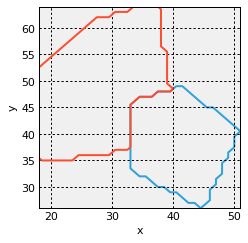

In [20]:
c = 0
t = 0
cell = hv.Curve(experiment.roi_polys[c,t][0][0])
neuropil1 = hv.Curve(experiment.roi_polys[c,t][1][0])
cell*neuropil1


#### FISSA extracted traces
The final extracted traces can be found in ```experiment.matched``` as follows. For cell number ```c``` and tiff number `t`, the final extracted trace is given by:
```
experiment.matched[c,t][0,:]
```

In ```experiment.matched``` one can find the signals present in the cell ROI, ordered by how strongly they are present (relative to the surrounding regions). ```experiment.matched[c,t][0,:]``` gives the most strongly present signal, and is seen as the cell's 'true' signal. ```[i,:]``` for ```i=1,2,3,...``` gives the other signals which are present in the cell ROI.

As an example, plotting the extracted signal for the first trial for the first cell:

:Curve   [x]   (y)
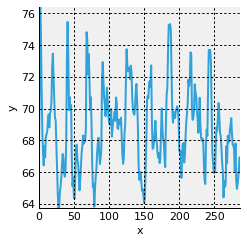

In [33]:
c = 0
t = 0
hv.Curve(experiment.matched[c,t][0,:])

#### Before decontamination
The raw extracted signals can be found in ```experiment.raw``` in the same way. Now in  ```experiment.raw[c,t][i,:]```, ```i``` indicates the region number, with ```i=0``` being the cell, and ```i=1,2,3,...``` indicating the surrounding regions.

## Exporting to MATLAB
The results can easily be exported to MATLAB as follows:

In [31]:
filename = 'extracted.mat'
experiment.save_to_matlab(filename)

Loading ```extracted.mat``` will give you three structs, ```ROIs```, ```raw```, and ```fissa```.

These interface similarly as ```experiment.ROIs```, ```experiment.raw```, and ```experiment.matched``` described above. However, Matlab counts from 1 (as opposed to Python counting from 0), such that the ROI, raw trace, and decontaminated trace are all found for cell 0 trial 0 as:
```
ROIs.cell0.trial0{1} % polygon for the ROI
ROIs.cell0.trial0{2} % polygon for first neuropil region
fissa.cell0.trial0(1,:) % final extracted cell signal
fissa.cell0.trial0(2,:) % contaminating signal
raw.cell0.trial0(1,:) % raw measured celll signal
raw.cell0.trial0(2,:) % raw signal from first neuropil region
```